In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/HARSHA1352/OIBSIP/main/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into features (X) and target (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an MLPRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf.predict(X_test_scaled)



In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.6793411999999988
R2 Score: 0.9784770642601495


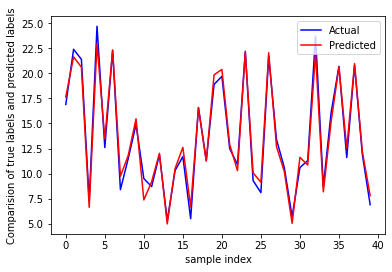

In [27]:
#Comparision between predicted sales and actual sales
import matplotlib.pyplot as plt
plt.plot(range(len(y_test)),y_test,color='b',label="Actual")
plt.plot(range(len(y_pred)),y_pred,color='r',label="Predicted")
plt.xlabel("sample index")
plt.ylabel("Comparision of true labels and predicted labels")
plt.legend(loc="upper right")
plt.show()

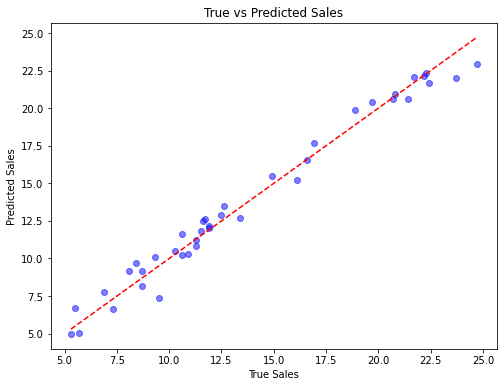

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.xlabel('True Sales')
plt.ylabel('Predicted Sales')
plt.title('True vs Predicted Sales')
plt.show()